In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, filters, metrics
import cv2
from prettytable import PrettyTable 

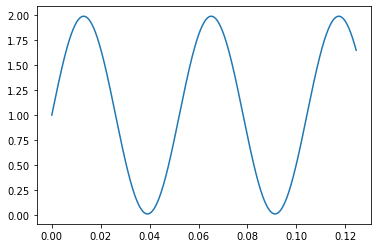

0.0083
120.5


In [35]:
width = 50
resolution = 6000
delta = round((width/ resolution), 4) #период дискретизации
fs = round(1/delta, 1) #частота дискретизации
coef = 4
frequency = fs
phase= 0
n_px = 15 #Число пикселей в линейке регистрирующей среды -> выходной размер изображения
x = np.arange(0, delta * n_px, delta / 100) # значения по x
y=0.999 + 0.99*np.sin(frequency * x + phase) 
fig = plt.subplots()
plt.plot(x, y)
plt.show()
print (delta)
print (fs)

In [3]:
def function(x):
    return 0.5 + 0.5*np.sin(frequency * x + phase)
counts_num = 50 
# Функция дискретизации 
def sampling(s_frequancy):
    out = []
    x = 0
    while x < counts_num:
        y = function(x)
        y1 = function(x + s_frequancy)
        out.append(round((y + y1) / 2, 2))
        x += s_frequancy
    return np.array(out)

In [4]:
# Преобразование дискретных значений в изображение
def image(row): 
    row = np.around(255 * row)
    image = np.full((row.size, row.size), row)
    return image

<Figure size 432x288 with 0 Axes>

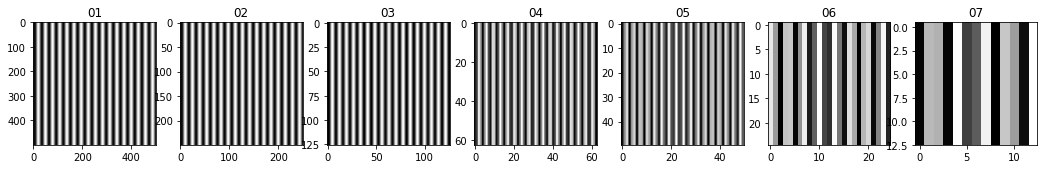

In [5]:
img1 = image(sampling(0.1))
img2 = image(sampling(0.2))
img3 = image(sampling(0.4))
img4 = image(sampling(0.8))
img5 = image(sampling(1))
img6 = image(sampling(2))
img7 = image(sampling(4))

fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5, ax6,ax7] ) = plt.subplots(
    nrows=1, ncols=7,
    figsize=(18, 14)
)

ax1.set_title('01')
ax2.set_title('02')
ax3.set_title('03')
ax4.set_title('04')
ax5.set_title('05')
ax6.set_title('06')
ax7.set_title('07')


ax1.imshow(img1, cmap='gray')
ax2.imshow(img2, cmap='gray')
ax3.imshow(img3, cmap='gray')
ax4.imshow(img4,cmap='gray')
ax5.imshow(img5, cmap='gray')
ax6.imshow(img6, cmap='gray')
ax7.imshow(img7,cmap='gray')

plt.show()

In [6]:
# Изменение размера - интерполяция методом ближайшего соседа
def interpolation(img, size):
    out = cv2.resize(img, size, cv2.INTER_NEAREST)
    return out

<Figure size 432x288 with 0 Axes>

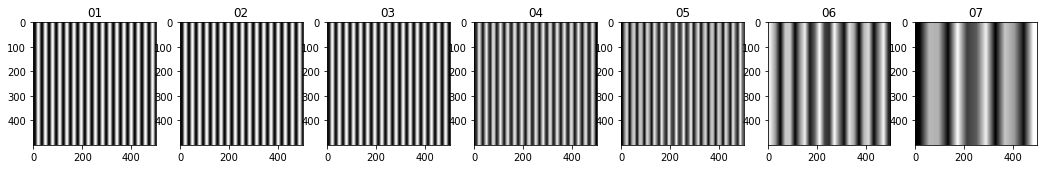

In [7]:
img1Intr = interpolation(img1, img1.shape)
img2Intr = interpolation(img2, img1.shape)
img3Intr = interpolation(img3, img1.shape)
img4Intr = interpolation(img4, img1.shape)
img5Intr = interpolation(img5, img1.shape)
img6Intr = interpolation(img6, img1.shape)
img7Intr = interpolation(img7, img1.shape)

fig = plt.figure()

fig, ([ax1, ax2, ax3, ax4, ax5, ax6,ax7] ) = plt.subplots(
    nrows=1, ncols=7,
    figsize=(18, 14)
)

ax1.set_title('01')
ax2.set_title('02')
ax3.set_title('03')
ax4.set_title('04')
ax5.set_title('05')
ax6.set_title('06')
ax7.set_title('07')


ax1.imshow(img1Intr, cmap='gray')
ax2.imshow(img2Intr, cmap='gray')
ax3.imshow(img3Intr, cmap='gray')
ax4.imshow(img4Intr,cmap='gray')
ax5.imshow(img5Intr, cmap='gray')
ax6.imshow(img6Intr, cmap='gray')
ax7.imshow(img7Intr,cmap='gray')

plt.show()

In [37]:
images = [img1Intr, img2Intr, img3Intr, img4Intr, img5Intr, img6Intr, img7Intr]

table = PrettyTable()
table.field_names = ["№", "Изображение", "MSE", "PSNR", "SSIM"]

for i in range(len(images)):
    #Расчет показателей  
    mse = round(metrics.mean_squared_error(img1, images[i]) / 255, 3) 
    psnr = round(metrics.peak_signal_noise_ratio(img1, images[i], data_range=255), 3)
    ssim = round(metrics.structural_similarity(img1, images[i]), 3)
    temp = []   #строка таблицы 
    temp.append(i+1)
    temp.append(" " + str(i+1))
    temp.extend((mse, psnr, ssim))
    table.add_row(temp)

print(table)

+---+-------------+--------+--------+--------+
| № | Изображение |  MSE   |  PSNR  |  SSIM  |
+---+-------------+--------+--------+--------+
| 1 |       1     |  0.0   |  inf   |  1.0   |
| 2 |       2     | 0.045  | 37.567 | 0.994  |
| 3 |       3     | 7.147  | 15.524 | 0.658  |
| 4 |       4     | 11.716 | 13.378 | 0.508  |
| 5 |       5     | 15.114 | 12.272 | 0.415  |
| 6 |       6     | 42.762 | 7.755  | -0.099 |
| 7 |       7     | 32.96  | 8.886  | 0.007  |
+---+-------------+--------+--------+--------+
